In [6]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from architecture.snn_architecture import SmallSNNAutoencoder, BigSNNAutoencoder
from src.mnist_snn_loading import get_snn_autoencoder_dataloaders

import torch.nn as nn
import matplotlib.pyplot as plt

# Set the project root directory
_PROJECT_ROOT_DIR = os.getcwd()

In [9]:


# Define batch size for data loading
batch_size = 32

# Load data using the existing function
print("Loading datasets...")
train_loader, val_loader, test_loader = get_snn_autoencoder_dataloaders(
  batch_size=batch_size, 
  data_root='data'
)
print(f"Data loaded successfully with batch size {batch_size}")

Loading datasets...
Original train_subset: 50000 samples. Zeros: 4923, Non-zeros: 45077
Filtered train_loader_ae: 45077 samples (should be non-zeros).
Data loaded successfully with batch size 32


Model successfully loaded from /Users/admin/Desktop/studia/practical_work/models/mnist/snn/temporal/BigSNNAutoencoder_Latent_16.pth


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_23212/190358726.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model

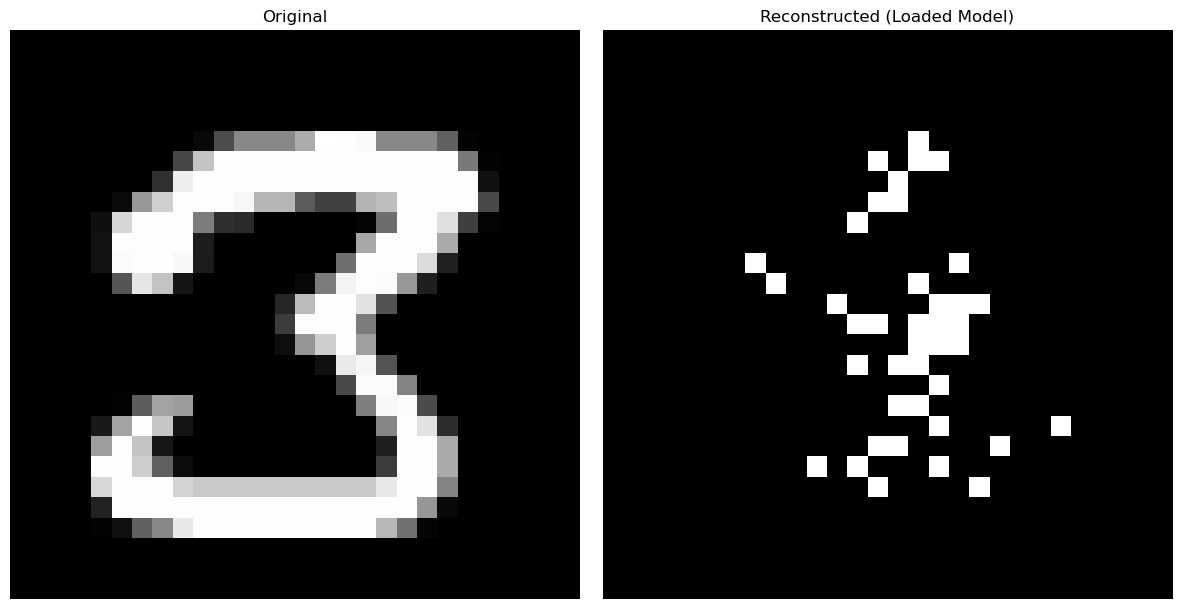

In [10]:
import os

# Create the full path for the model
model_path = os.path.join(_PROJECT_ROOT_DIR, 'models/mnist/snn/temporal/BigSNNAutoencoder_Latent_16.pth')

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load the trained model
loaded_model = BigSNNAutoencoder(latent_size=16).to(device)

try:
  # Try to load the model
  loaded_model.load_state_dict(torch.load(model_path, map_location=device))
  print(f"Model successfully loaded from {model_path}")
  
  # Set to evaluation mode
  loaded_model.eval()
  
  # Test with a sample from the validation set to verify loading worked
  val_loader_iter = iter(val_loader)
  test_spike_data, test_target = next(val_loader_iter)

  with torch.no_grad():
    test_spike_data = test_spike_data.to(device)
    test_reconstruction = loaded_model(test_spike_data).cpu()
  
  # Display a sample reconstruction
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(test_target[0].reshape(28, 28), cmap='gray')
  plt.title('Original')
  plt.axis('off')
  
  plt.subplot(1, 2, 2)
  plt.imshow(test_reconstruction[0].reshape(28, 28), cmap='gray')
  plt.title('Reconstructed (Loaded Model)')
  plt.axis('off')
  
  plt.tight_layout()
  plt.show()
  
except FileNotFoundError:
  print(f"Model file not found at {model_path}")
  print("Make sure the model has been saved at the correct location.")
except Exception as e:
  print(f"Error loading model: {e}")

Shape of reconstruction: torch.Size([784])
Min value: 0.0
Max value: 1.0
Mean value: 0.051020409911870956
Std value: 0.22017982602119446
Shape of test_target: torch.Size([784])
Min value: 0.0
Max value: 1.0
Mean value: 0.2048119157552719
Std value: 0.3708972930908203


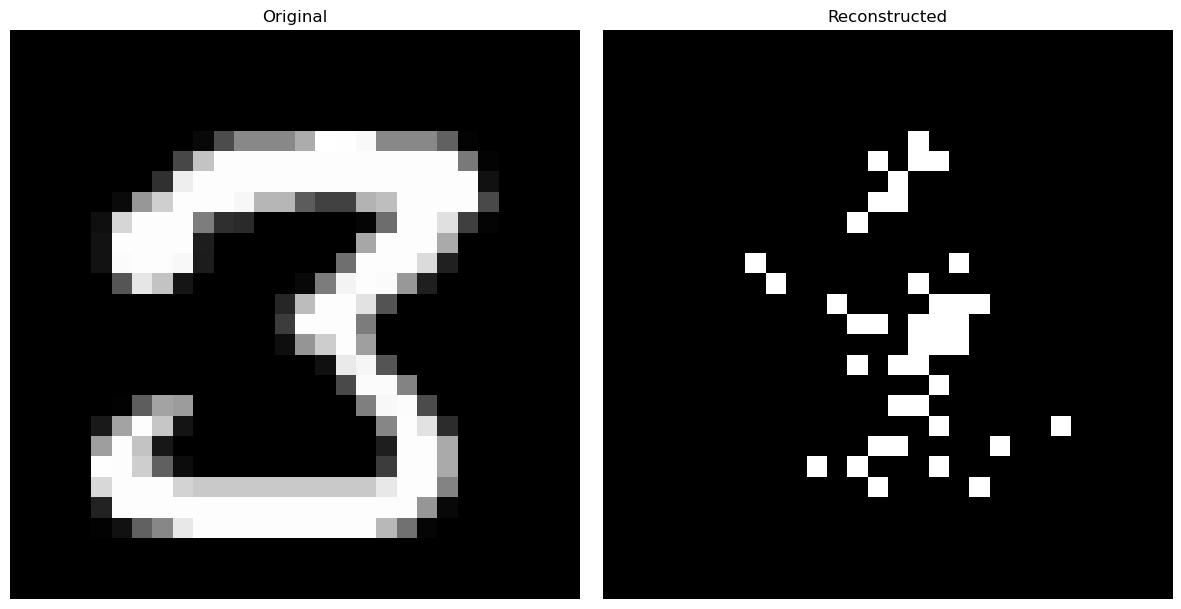

In [13]:
# Get a single example from validation set
val_loader_iter = iter(val_loader)
test_spike_data, test_target = next(val_loader_iter)

# Move data to device and get reconstruction
with torch.no_grad():
    test_spike_data = test_spike_data.to(device)
    test_reconstruction = loaded_model(test_spike_data)

# Print shape and scale information
print("Shape of reconstruction:", test_reconstruction[0].shape)
print("Min value:", test_reconstruction[0].min().item())
print("Max value:", test_reconstruction[0].max().item())
print("Mean value:", test_reconstruction[0].mean().item())
print("Std value:", test_reconstruction[0].std().item())

# print shape and scale information for test_target
print("Shape of test_target:", test_target[0].shape)
print("Min value:", test_target[0].min().item())
print("Max value:", test_target[0].max().item())
print("Mean value:", test_target[0].mean().item())
print("Std value:", test_target[0].std().item())

# Visualize the reconstruction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(test_target[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_reconstruction[0].cpu().reshape(28, 28), cmap='gray')
plt.title('Reconstructed')
plt.axis('off')

plt.tight_layout()
plt.show()


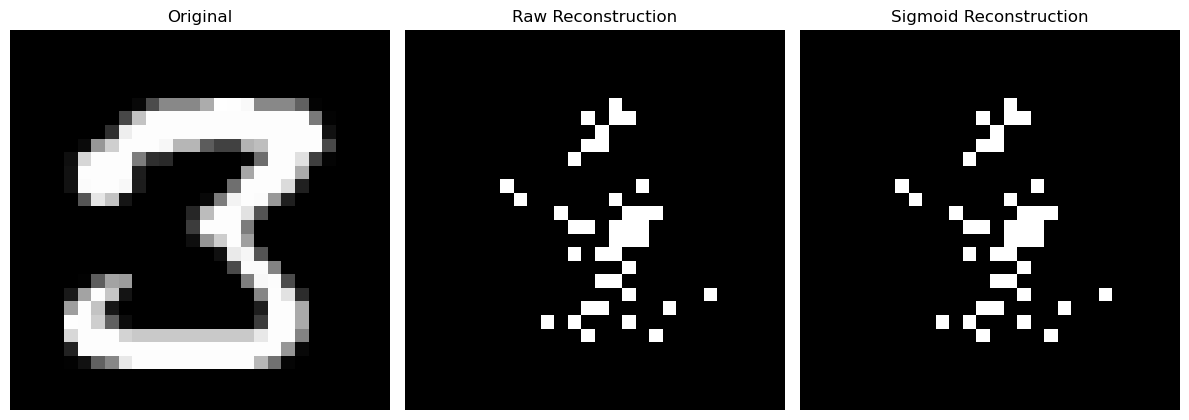


Sigmoid Reconstruction Statistics:
Min value: 0.5
Max value: 0.7310585975646973
Mean value: 0.5117887258529663
Std value: 0.05087444558739662


In [14]:
# Apply sigmoid to the reconstruction and visualize
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(test_target[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

# Raw reconstruction
plt.subplot(1, 3, 2)
plt.imshow(test_reconstruction[0].cpu().reshape(28, 28), cmap='gray')
plt.title('Raw Reconstruction')
plt.axis('off')

# Sigmoid reconstruction
plt.subplot(1, 3, 3)
sigmoid_reconstruction = torch.sigmoid(test_reconstruction[0])
plt.imshow(sigmoid_reconstruction.cpu().reshape(28, 28), cmap='gray')
plt.title('Sigmoid Reconstruction')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print statistics for sigmoid reconstruction
print("\nSigmoid Reconstruction Statistics:")
print("Min value:", sigmoid_reconstruction.min().item())
print("Max value:", sigmoid_reconstruction.max().item())
print("Mean value:", sigmoid_reconstruction.mean().item())
print("Std value:", sigmoid_reconstruction.std().item())
